### 1. Import the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 2. Import Dataset

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')

### 3. Split the dataset into Training and Test groups (use 20-80 split, i.e. 20% of data will be used for the Test group and 80 for training)

In [3]:
# Split the dataset into Training and Test groups (use 20-80 split)
from sklearn.model_selection import train_test_split
X = dataset.iloc[:, [0, 1]].values
y = dataset.iloc[:, 2].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


### 4. Perform feature scaling. (do not scale y – remember y=0/1 so it needs no scaling).

In [4]:
## Perform feature scaling. (do not scale y – remember y=0/1 so it needs no scaling)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### 5. Train the SVC classifier (for the classifier specify random_state=0 to ensure that everybody gets the same results. Also choose the ‘linear’ kernel -- you must specify this choice, otherwise the default kernel is ‘rbf’).

In [5]:
# Train the SVC classifier (for the classifier specify random_state=0 to ensure that everybody gets the same results. Also choose the ‘linear’ kernel -- you must specify this choice, otherwise the default kernel is ‘rbf’)
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

### 6. Make predictions and compare the results by displaying the predicted values of y next to the test values of y in a two-dimensional array.

In [6]:
#  Make predictions
y_pred = classifier.predict(X_test)
# displaying the predicted values of y next to the test values of y in a two-dimensional array

print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


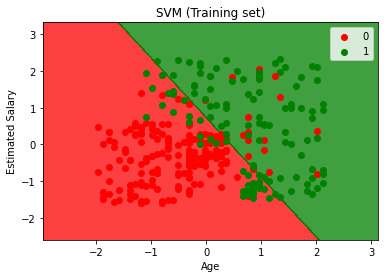

In [7]:
# Visualize training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01), 
                        np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


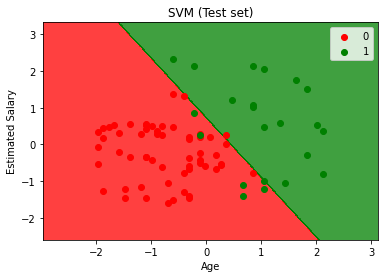

In [8]:
# Visualize test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                        np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


### 7. Create and print the Confusion Matrix and the accuracy score of the model and interpret the two.

In [9]:
### Create and print the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("accuracy_score = {}".format(accuracy_score(y_test, y_pred)))


[[57  1]
 [ 6 16]]
accuracy_score = 0.9125


* There are 57 correct predictions that the person will buy a SUV.
* There is one wrong prediction that the person will buy a SUV.
* There are 6 wrong predictions that the person will not buy a SUV.
* There are 16 correct prediction that the person will not buy a SUV.

The 0.91 accuracy score is a quite good and tells us that there is no overfitting. There are more wrong predictions that a person will not buy a SUV which might mean that it is a bit more difficult to predict if a person will not buy than if they will buy.

### 8. Use the K-fold cross-validation method (use K=10; in python - cv=10) to ensure that the accuracy score calculated only on one test set was not just a lucky occurrence. Print the best accuracy score and the standard deviation of the scores computed. Comment on the result, compare to the score computed when using only one test set in (7).

In [10]:
# Use the K-fold cross-validation method (use K=10; in python - cv=10)
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)
print("accuracies = {}".format(accuracies))
print("max accuracy = {}".format(accuracies.max()))
print("mean = {}".format(accuracies.mean()*100))
print("std = {}".format(accuracies.std()*100))

accuracies = [0.78125 0.78125 0.90625 0.6875  0.875   0.625   0.78125 0.90625 0.96875
 0.875  ]
max accuracy = 0.96875
mean = 81.875
std = 10.155048005794951


With K-Fold the mean accuracy is lower, but the standard deviation is quite big. This would mean that the chuncks of data are very different in the way how thay fit the model. At step 7 the SVC got a lucky subset of data. Or, because of using a biger subset previously, the model was better trained. K-Fold uses smaller subsets, not 80% of the data, but 10% of the data. It was proven that bigger datasets for training can increase the accuracy of the model. 

### 9. Implement the grid search method to tune the following two hyper parameters:

C - is a parameter of regularization. One can control the possibility of over-fitting by specifying different values of C. Try the following values for C = 0.25, 0.5, 0.75, 1.

Kernel – is the kernel used to manipulate the data. Try the following two kernels: ‘linear’, ‘rbf’.

In [11]:
# Implement the grid search method to tune the following two hyper parameters:
# 1. C (C=0.25, 0.5, 0.75, 1)
# 2. Kernel (linear, rbf)
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
                {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf']}]
grid_search = GridSearchCV(estimator=classifier,
                            param_grid=parameters,
                            scoring='accuracy',
                            cv=10,
                            n_jobs=-1)
grid_search = grid_search.fit(X_train, y_train)


### 10. Print the accuracy score of the best performing model found by the grid search. Print the parameters of the best model.

In [12]:
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
best_classifier = grid_search.best_estimator_

print("best_accuracy = {}".format(best_accuracy))
print("best_parameters = {}".format(best_parameters))
print("best_classifier = {}".format(best_classifier))

best_accuracy = 0.9
best_parameters = {'C': 1, 'kernel': 'rbf'}
best_classifier = SVC(C=1, random_state=0)
